# <center>Matplotlib可视化</center>

**可以解决pandas绘图中坐标轴无法显示中文以及负数的问题**

# 1 导入包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 配置matplotlib

In [3]:
# 配置matplotlib页内可视
%matplotlib inline
# 配置matplotlib可显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 配置matplotlib坐标轴可显示负数
plt.rcParams['axes.unicode_minus'] = False

# 3 加载数据文件

In [4]:
df = pd.read_csv('./pandas_data/position_utf8.csv')

In [5]:
df.head(1)

,Unnamed: 0,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,buttom,top,avg
0,0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7.0,9.0,8.0


In [6]:
f = df.groupby('city').avg.count()

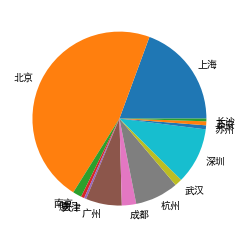

In [7]:
plt.pie(x=f, labels=f.index)
plt.show()

**中文可以正常显示**

In [8]:
s = np.random.randint(-20, 20, 20)

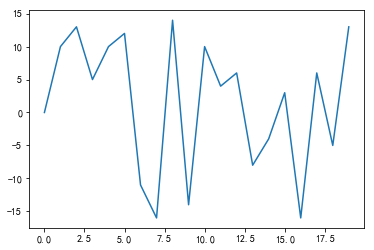

In [9]:
plt.plot(s)
plt.show()

**坐标轴负数可以正常显示**

# 4 图表参数设置

- **图标名称**
- **图标数值**
- **x轴**
    - **x轴刻度：xticks**
    - **x轴标签：xlabel**
- **y轴**
    - **y轴刻度：yticks**
    - **y轴标签:  ylabel**

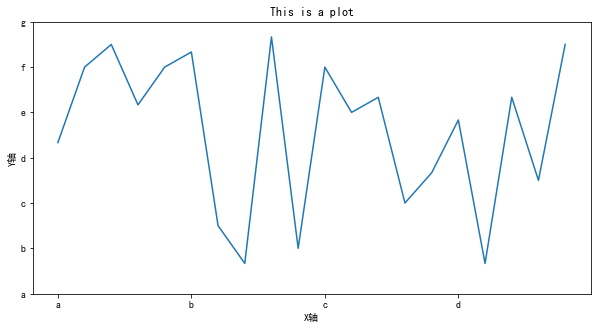

In [13]:
plt.figure(1, figsize=(10, 5))
plt.plot(s)
# 设置图标标题
plt.title('This is a plot')
# 设置x轴刻度
plt.xticks(ticks=range(0, 20, 5), labels=list('abcd'))
plt.xlabel('X轴')
plt.yticks(ticks=range(-20, 20, 6), labels=list('abcdefg'))
plt.ylabel('Y轴')
plt.show()

**多条折线图和图例**

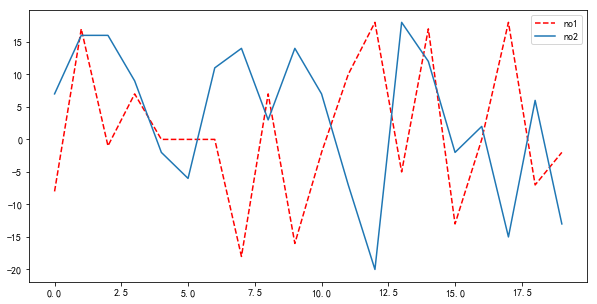

In [26]:
plt.figure(1, figsize=(10, 5))
plt.plot(np.random.randint(-20, 20, 20),  'r--', label='no1')
plt.plot(np.random.randint(-20, 20, 20), label='no2')
plt.legend()
plt.show()

**不同教育下各个公司的平均招聘薪资和招聘职位数的散点图（绘制在同一张图中）**

In [28]:
df.head(1)

,Unnamed: 0,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,buttom,top,avg
0,0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7.0,9.0,8.0


In [32]:
data = df.groupby(['education', 'companyId']).agg(['mean', 'count']).avg.reset_index()

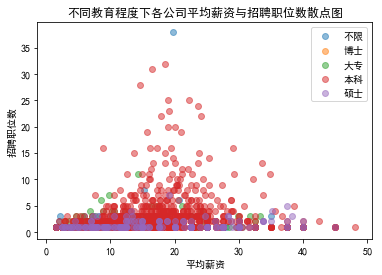

In [47]:
for edu, grouped in data.groupby('education'):
    temp = grouped.query('mean<50' ).query('count<50')
    x = temp['mean']
    y = temp['count']
    plt.scatter(x, y, label=edu, alpha=0.5)
plt.title('不同教育程度下各公司平均薪资与招聘职位数散点图')
plt.xlabel('平均薪资')
plt.ylabel('招聘职位数')
plt.legend()
plt.show()

**一张画布上画多个图表：**

- **规范的一行两列图表**

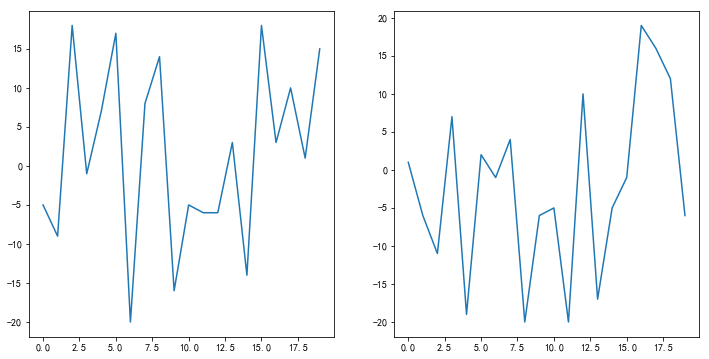

In [62]:
plt.figure(figsize=(12, 6))
# 第一张图表
plt.subplot(121)
plt.plot(np.random.randint(-20, 20, 20))
# 第二张图表，等价于plt.subplot(1, 2, 2)，表示一行两列中的第二张图标
plt.subplot(122)
plt.plot(np.random.randint(-20, 20, 20))

plt.show()

- **两行两列显示三张图表**

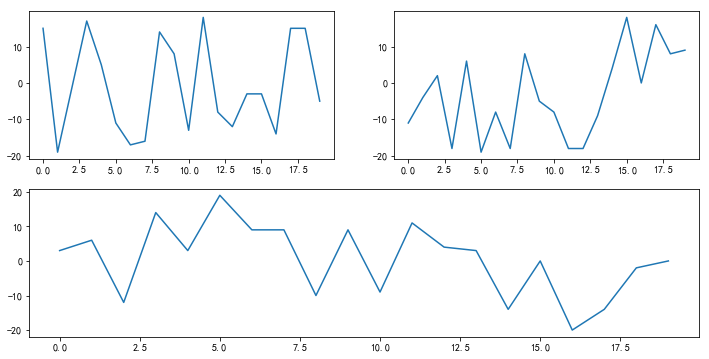

In [68]:
plt.figure(figsize=(12, 6))
# 第一张图表
plt.subplot(221)
plt.plot(np.random.randint(-20, 20, 20))
# 第二张图表，等价于plt.subplot(1, 2, 2)，表示一行两列中的第二张图标
plt.subplot(222)
plt.plot(np.random.randint(-20, 20, 20))
# 第三张图表
plt.subplot(212)
plt.plot(np.random.randint(-20, 20, 20))

plt.show()